<a href="https://www.kaggle.com/code/mahmoudsehsah/nlp-using-hugging-face-transformer?scriptVersionId=163329140" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# What is NLP
NLP is a field of linguistics and machine learning focused on understanding everything related to human language. The aim of NLP tasks is not only to understand single words individually, but to be able to understand the context of those words.
## Tasks that can use NLP 
* Classifying whole sentences: Getting the sentiment of a review, detecting if an email is spam, determining if a sentence is grammatically correct or whether two sentences are logically related or not
* Classifying each word in a sentence: Identifying the grammatical components of a sentence (noun, verb, adjective), or the named entities (person, location, organization)
* Generating text content: Completing a prompt with auto-generated text, filling in the blanks in a text with masked words
* Extracting an answer from a text: Given a question and a context, extracting the answer to the question based on the information provided in the context
* Generating a new sentence from an input text: Translating a text into another language, summarizing a text

# Getting started with HugginFace Transformers
The most basic object in the Transformers library is the pipeline() function. 
It connects a model with its necessary preprocessing and postprocessing steps, allowing us to directly input any text and get an intelligible answer:

All types of pipeline can be found from: https://huggingface.co/docs/transformers/en/main_classes/pipelines#transformers.pipeline.task

In [9]:
## Summarization Pipeline
from transformers import pipeline

classifier = pipeline("summarization")
classifier("Deep learning is the subset of machine learning methods based on artificial neural networks (ANNs) with representation learning. The adjective deep refers to the use of multiple layers in the network. Methods used can be either supervised, semi-supervised or unsupervised.")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Your max_length is set to 142, but your input_length is only 54. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)


[{'summary_text': ' Deep learning is the subset of machine learning methods based on artificial neural networks (ANNs) with representation learning . The adjective deep refers to the use of multiple layers in the network. Methods used can be either supervised, semi-supervised or unsupervised . Methods used in this type of learning can be supervised or supervised .'}]

In [10]:
## Sentiment-analysis Pipeline
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("Deep learning is the subset of machine learning methods based on artificial neural networks (ANNs) with representation learning. The adjective deep refers to the use of multiple layers in the network. Methods used can be either supervised, semi-supervised or unsupervised.")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.5855541229248047}]

## How huggingFace pipeline works
By default, this pipeline selects a particular pretrained model that has been fine-tuned for sentiment analysis in English. The model is downloaded and cached when you create the classifier object. If you rerun the command, the cached model will be used instead and there is no need to download the model again.

There are three main steps involved when you pass some text to a pipeline:

The text is preprocessed into a format the model can understand.
The preprocessed inputs are passed to the model.
The predictions of the model are post-processed, so you can make sense of them.

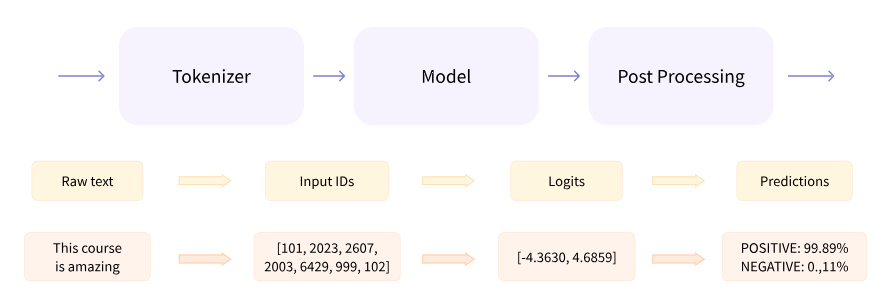

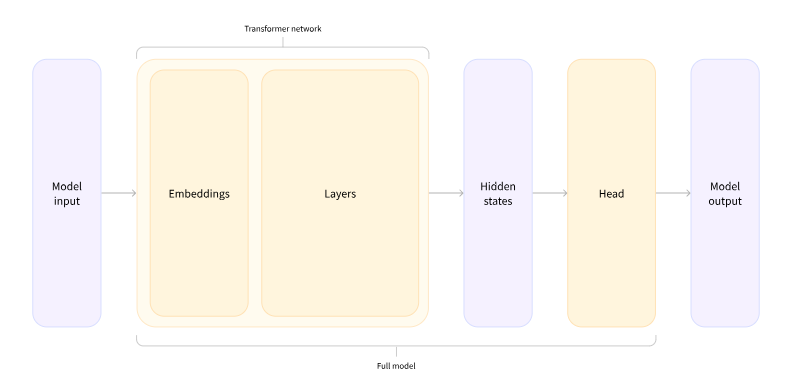

## How to specify a specific model

In [29]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-2")
model = AutoModelForCausalLM.from_pretrained("microsoft/phi-2")

nlp = pipeline("text-generation", model=model, tokenizer=tokenizer)
example = "What is deep learning ?"

ner_results = nlp(example)
print(ner_results)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'What is deep learning ?\nDeep learning is a subset of machine learning that uses artificial neural networks to'}]


## Note 
**Architectures vs. checkpoints**
As we dive into Transformer models in this course, you’ll see mentions of architectures and checkpoints as well as models. These terms all have slightly different meanings:

Architecture: This is the skeleton of the model — the definition of each layer and each operation that happens within the model.
Checkpoints: These are the weights that will be loaded in a given architecture.
Model: This is an umbrella term that isn’t as precise as “architecture” or “checkpoint”: it can mean both. This course will specify architecture or checkpoint when it matters to reduce ambiguity.
For example, BERT is an architecture while bert-base-cased, a set of weights trained by the Google team for the first release of BERT, is a checkpoint. However, one can say “the BERT model” and “the bert-base-cased model.”

## Tokenization

Tokenizers are essential in converting text into numbers for NLP models to understand. They break down text into smaller parts, like words or characters, and assign numerical values to them. This process helps models grasp the meaning of the text. There are different types of tokenizers, such as those based on words, characters, or subwords, each with its pros and cons. The main goal is to find a balance between keeping the text's meaning and making it easy for models to process. Subword tokenization is especially useful because it combines the benefits of word and character-based methods, leading to efficient and meaningful text processing in NLP.


### Tokenization

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using a Transformer network is simple"
tokens = tokenizer.tokenize(sequence)

print(tokens)

### From tokens to input IDs

In [ ]:
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

### Decoding

In [ ]:
decoded_string = tokenizer.decode([7993, 170, 11303, 1200, 2443, 1110, 3014])
print(decoded_string)

### Padding and Truncation
Padding and truncation are essential preprocessing steps in natural language processing (NLP) tasks, especially when working with deep learning models like those used for sequence classification, language modeling, and other NLP tasks. They are crucial for dealing with the variability in the length of text data. Let's delve into why each is important:

Why We Use Truncation:
Make Texts the Same Length: Texts can be long or short, but the computer likes them all the same size. If a text is too long, we cut it to fit.
Save Time and Space: Shorter texts are quicker and easier for the computer to handle, saving energy and time.

Why We Use Padding:
Fill in the Gaps: If a text is too short, we add extra empty spaces to make it the right size, so all texts match in length.
Work in Groups: Computers are faster when they can work on many texts at once. Making all texts the same length helps with this.

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

tokens = tokenizer(sequences, padding=True, truncation=True, max_length=8, return_tensors="pt")
output = model(**tokens)